## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [2]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
df = pd.read_csv('QueryResults.csv', header=0, names=["DATE", "TAG", "POSTS"])

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [5]:
df.shape

(2579, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [6]:
df['TAG'].count()
df.count()

DATE     2579
TAG      2579
POSTS    2579
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [13]:
df.groupby('TAG').sum(numeric_only=True).sort_values('POSTS', ascending=False)

,POSTS
TAG,
javascript,2520419
python,2177757
java,1912017
c#,1609983
php,1462257
c++,803783
r,502347
c,402407
swift,332129


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [21]:
df.groupby('TAG').count()['DATE']

TAG
assembly      186
c             186
c#            187
c++           186
delphi        186
go            171
java          186
javascript    186
perl          186
php           186
python        186
r             184
ruby          186
swift         177
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [22]:
pd.to_datetime(df['DATE'][1])

Timestamp('2008-08-01 00:00:00')

In [24]:
df.DATE = pd.to_datetime(df['DATE'])

In [26]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation



In [27]:
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [28]:
reshaped_df.shape

(187, 14)

In [29]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [30]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [31]:
reshaped_df['c'].count()

186

In [32]:
reshaped_df['python'].count()

186

In [33]:
reshaped_df['java'].count()

186

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [34]:
import matplotlib.pyplot as plt

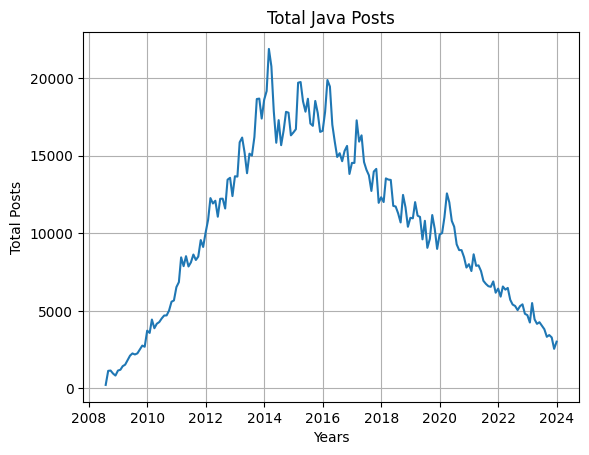

In [89]:
x = reshaped_df.index
plt.xlabel('Years')
plt.ylabel('Total Posts')
plt.title('Total Java Posts')
plt.grid(True)
plt.plot(x, reshaped_df['java'], label='Java')

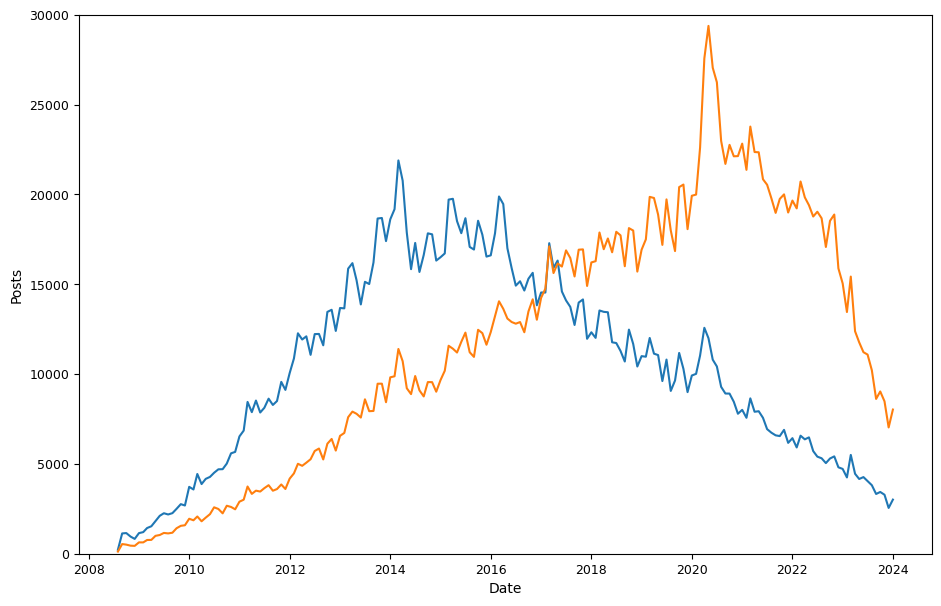

In [90]:
plt.figure(figsize=(11, 7))
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Posts', fontsize=10)
plt.ylim(0, 30000)
plt.plot(x, reshaped_df['java'], label='Java')
plt.plot(x, reshaped_df['python'], label='Python')

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

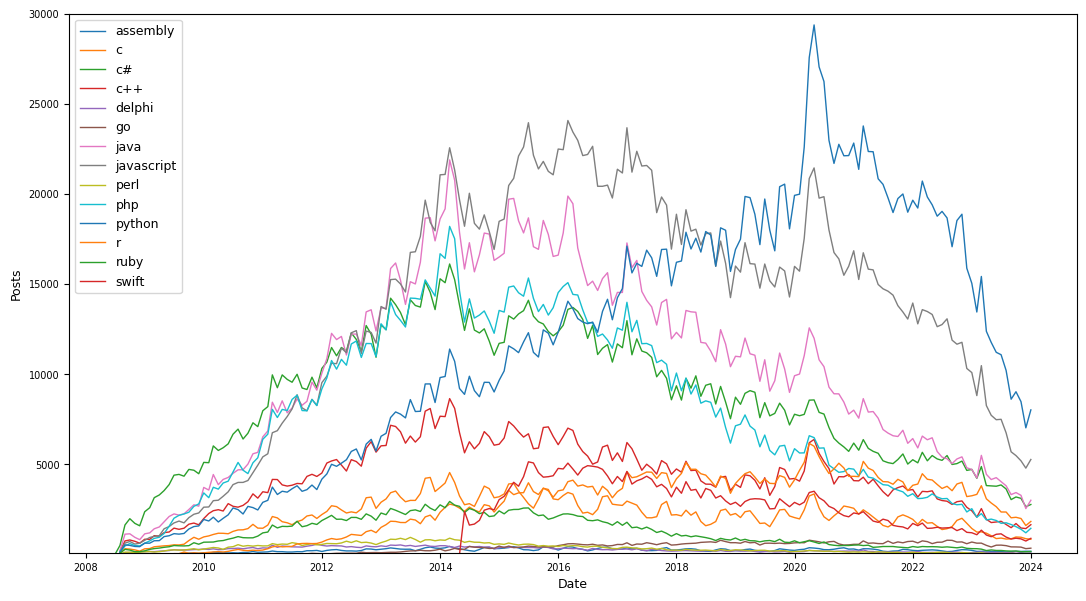

In [105]:
plt.figure(figsize=(13, 7))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Posts', fontsize=9)
plt.ylim(100, 30000)

for column in reshaped_df.columns:
  plt.plot(x, reshaped_df[column],
           linewidth=1, label=reshaped_df[column].name)
plt.legend(fontsize=9)

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

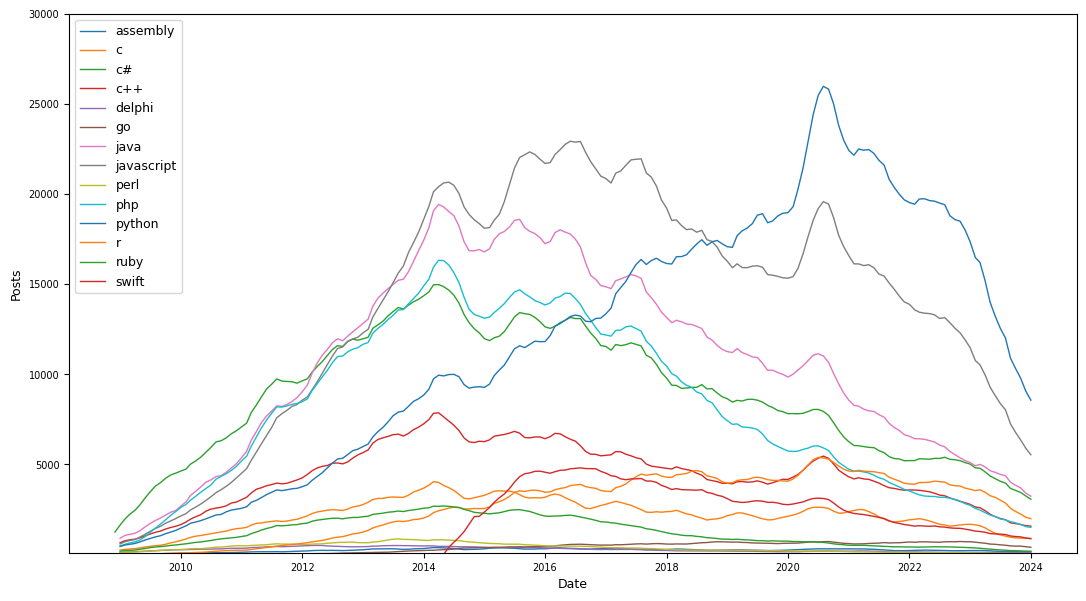

In [106]:
rooling_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(13, 7))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Posts', fontsize=9)
plt.ylim(100, 30000)

for column in rooling_df.columns:
  plt.plot(x, rooling_df[column],
           linewidth=1, label=rooling_df[column].name)
plt.legend(fontsize=9)

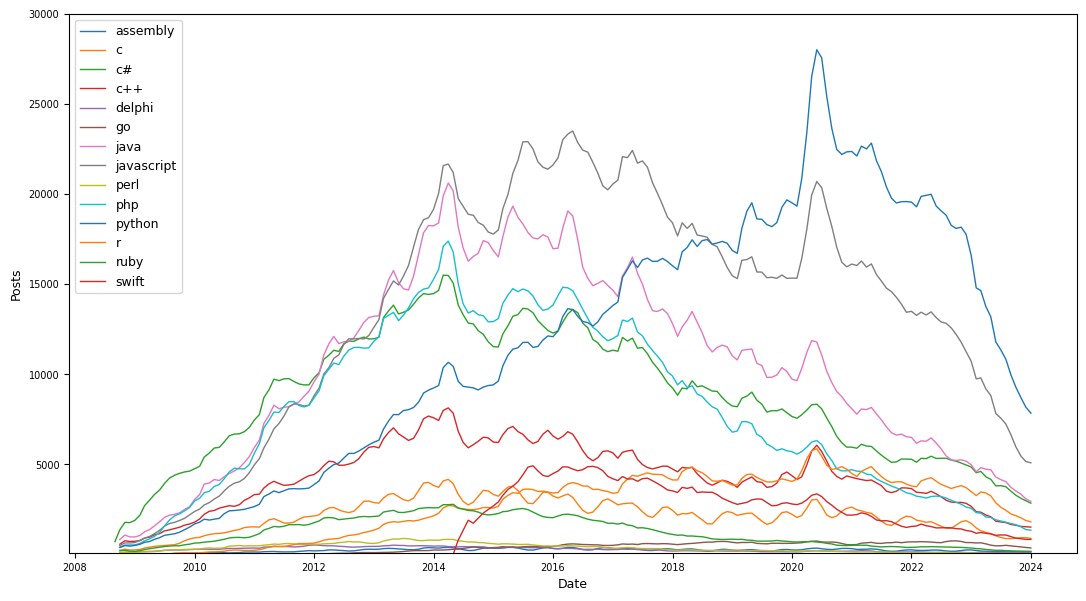

In [107]:
rooling_df = reshaped_df.rolling(window=3).mean()

plt.figure(figsize=(13, 7))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Posts', fontsize=9)
plt.ylim(100, 30000)

for column in rooling_df.columns:
  plt.plot(x, rooling_df[column],
           linewidth=1, label=rooling_df[column].name)
plt.legend(fontsize=9)

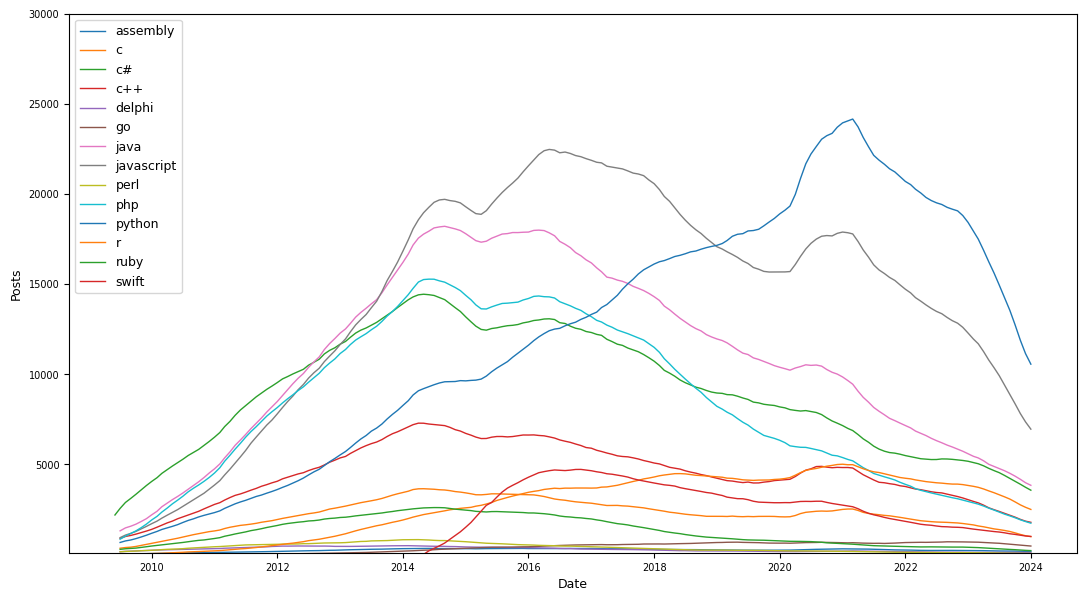

In [108]:
rooling_df = reshaped_df.rolling(window=12).mean()

plt.figure(figsize=(13, 7))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Posts', fontsize=9)
plt.ylim(100, 30000)

for column in rooling_df.columns:
  plt.plot(x, rooling_df[column],
           linewidth=1, label=rooling_df[column].name)
plt.legend(fontsize=9)

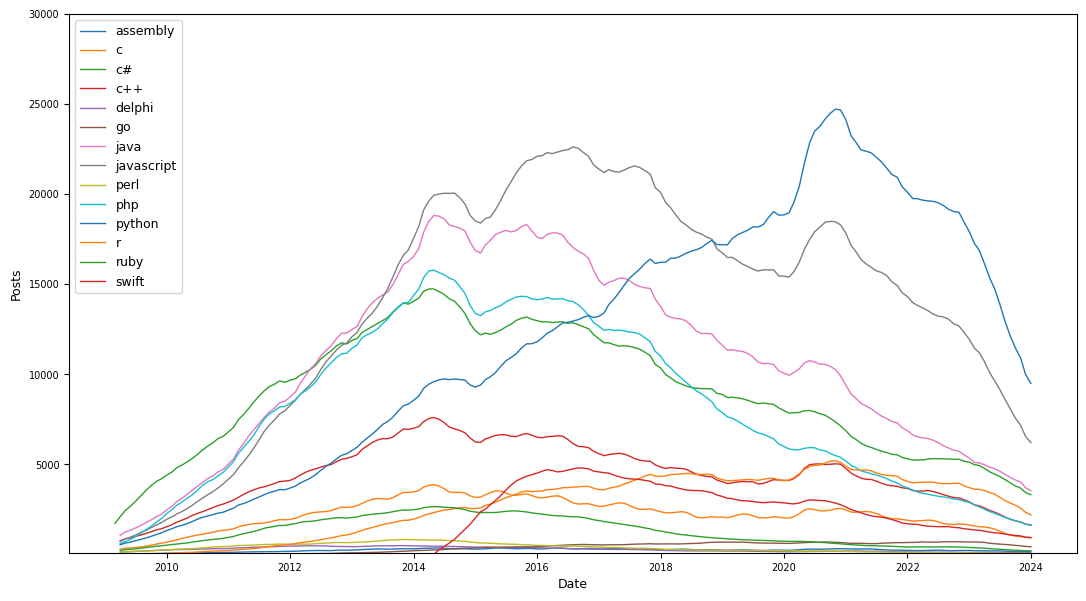

In [109]:
rooling_df = reshaped_df.rolling(window=9).mean()

plt.figure(figsize=(13, 7))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.xlabel('Date', fontsize=9)
plt.ylabel('Posts', fontsize=9)
plt.ylim(100, 30000)

for column in rooling_df.columns:
  plt.plot(x, rooling_df[column],
           linewidth=1, label=rooling_df[column].name)
plt.legend(fontsize=9)